# <p style="text-align: center;">WEEK - 6</p>
#### Aim : 
Write a program to perform Dimensionality Reduction using Principle
Component Analysis techniques on real time datasets.

## Description :

### Principle Component Analysis :
As the number of features or dimensions in a dataset increases, the amount of data required to obtain a statistically significant result increases
exponentially. This can lead to issues such as overfitting, increased
computation time, and reduced accuracy of machine learning models this is
known as the curse of dimensionality problems that arise while working with
high-dimensional data. <br >
    To address the curse of dimensionality, Feature Engineering techniques
are used which include feature selection and feature extraction. Dimensionality
Reduction is a type of feature extraction technique that aims to reduce the
number of input features while retaining as much of the original information as
possible. <br>
    One of the most popular dimensionality reduction technique is Principal Component Analysis(PCA). <br>
1) PCA comes under the Unsupervised Machine Learning category.
2) Reducing the number of variables in a data collection while retaining as
much information as feasible is the main goal of PCA. PCA can be mainly
used for Dimensionality Reduction and also for important feature selection.
3) Correlated features to Independent features.

### Implementation :
#### Importing Modules :

In [35]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

### Load the Dataset :
#### Program :

In [36]:
data = pd.read_csv('housing_price_dataset.csv').dropna()
print(data.head())

   SquareFeet  Bedrooms  Bathrooms Neighborhood  YearBuilt        Price
0        2126         4          1        Rural     1969.0  215355.2836
1        2459         3          2        Rural     1980.0  195014.2216
2        1860         2          1       Suburb     1970.0  306891.0121
4        2130         5          2       Suburb     2001.0  272436.2391
5        2095         2          3       Suburb     2020.0  198208.8039


### Select relevant features for Analysis :
#### Program :

In [37]:
selected_features = ['SquareFeet', 'Bedrooms', 'Price']
data = data[selected_features].dropna()
print(data)

    SquareFeet  Bedrooms         Price
0         2126         4  215355.28360
1         2459         3  195014.22160
2         1860         2  306891.01210
4         2130         5  272436.23910
5         2095         2  198208.80390
6         2724         2  343429.31910
8         2638         4  377998.58820
9         1121         5   95961.92601
10        1466         5  191113.76870
12        1330         2  132172.39260
13        2482         4  231157.02770
14        1087         4  118393.82320


### Standardize the Data :
#### Program :

In [38]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

### Apply PCA :
#### Program :

In [39]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

### BarPlot

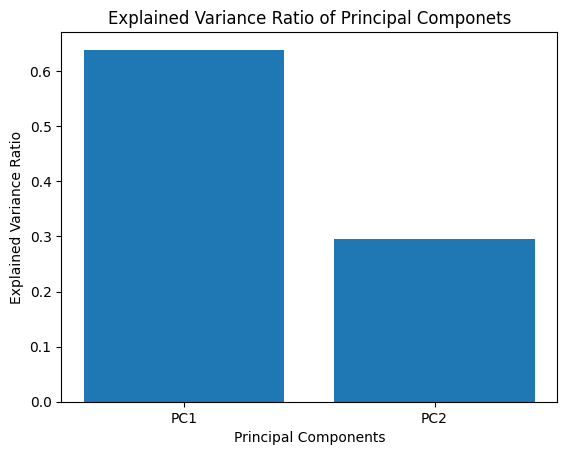

In [40]:
explained_variance = pca.explained_variance_ratio_
plt.bar(['PC1','PC2'],explained_variance)
plt.xlabel('Principal Components')
plt.ylabel("Explained Variance Ratio")
plt.title('Explained Variance Ratio of Principal Componets')
plt.show()

In [43]:
data_with_pc = pd.concat([pc_df],axis = 1)
print(data_with_pc.head())

   SquareFeet  Bedrooms  Bathrooms Neighborhood  YearBuilt        Price
0        2126         4          1        Rural     1969.0  215355.2836
1        2459         3          2        Rural     1980.0  195014.2216
2        1860         2          1       Suburb     1970.0  306891.0121
4        2130         5          2       Suburb     2001.0  272436.2391
5        2095         2          3       Suburb     2020.0  198208.8039


### Correlations

In [1]:
import seaborn as sns 
sns.heatmap(data_with_pc.corr(), annot = True)

NameError: name 'data_with_pc' is not defined

### Create DataFrame :
#### Program :

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Load the dataset
pc_df = pd.read_csv('housing_price_dataset.csv').dropna()

# Features and target variable
X = pc_df[['SquareFeet', 'Bedrooms', 'Price']]
y = pc_df['YearBuilt']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  


### Train a Random Forest classifier

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
print("Model fitted successfully")

Model fitted successfully


### Evaluate model performance

In [ ]:
train_accuracy = rf_classifier.score(X_train, y_train)
test_accuracy = rf_classifier.score(X_test, y_test)

print("Train Accuracy:", train_accuracy*100)
print("Test Accuracy:", test_accuracy*100)

Train Accuracy: 100.0
Test Accuracy: 0.0


### Make predictions

In [ ]:
y_pred = rf_classifier.predict(X_test)

### Compute confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)

### Plot confusion matrix

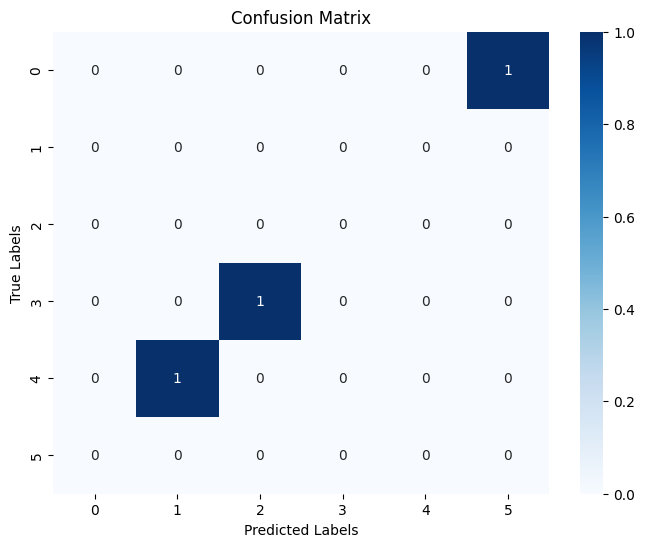

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### Calculate and visualize covariance matrix

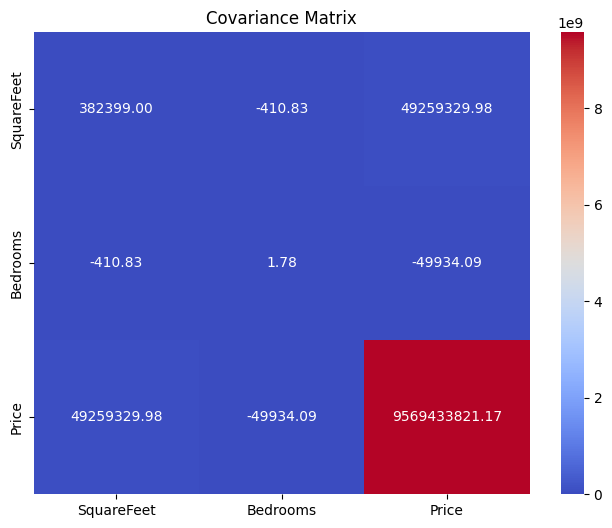

In [ ]:
cov_matrix = X_train.cov()
plt.figure(figsize=(8, 6))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Covariance Matrix')
plt.show()